                             Medical Cost Personal Insurance Project

Problem statement:
The purpose of this project is to predict the health insurance cost by performing EDA(Exploratory Dtaa Analysis) and buliding models based on the medical insurance dataset.Predicting the medical cost according to the features age,sex,bmi,children,smoker,region and charges.

In [ ]:
#import necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
#load dataset
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


There are 1388 rows and 7 coulumns in the above data set.Also there are numerical and categorical variables.we have to predict the insurance cost from the above dataseT.Here smoker region and sex is in string format.for better analysis we have to convert it in to numerical format.

In [5]:
#display top 5 rows and columns
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#display the tail end of 5 rows and columns
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
#Total number of rows and columns
df.shape

(1338, 7)

In [6]:
#column name
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#to get the column name as list format
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
#to get the type of data
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Have 2 integer int64 values,3 object types,2 float64 values

In [9]:
#to check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no null values present in the given data

In [10]:
#to know the number of unique values in the given dataset
df.isnull().nunique()  

age         1
sex         1
bmi         1
children    1
smoker      1
region      1
charges     1
dtype: int64

In [11]:
df.isnull().nunique().sum()

7

In [12]:
#to get the statistical measures
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here,count will be 1338 which means the number of total non empty values
mean and Standard deviation  are noted for all variables.
Minimum value is 18 and maximum value is 64.


In [13]:
#to determine the correlation between the variables
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


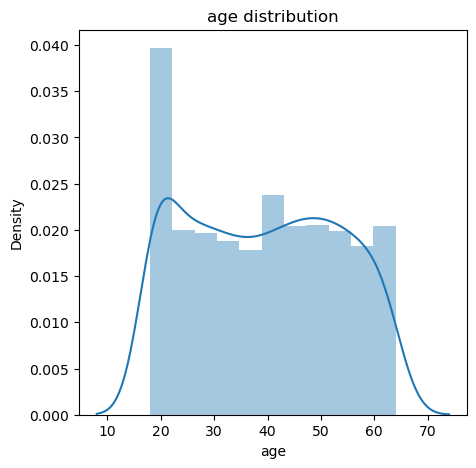

In [14]:
#Age Distribution
plt.figure(figsize=(5,5))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

In [15]:
print(df['age'].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


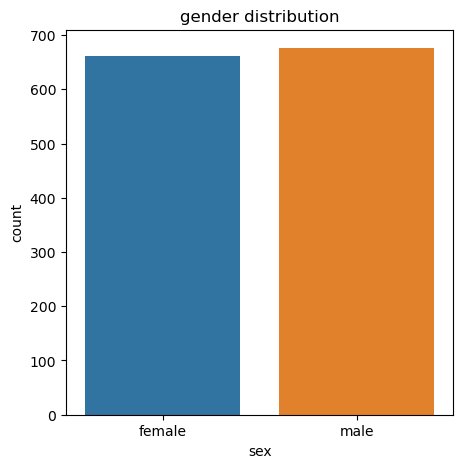

In [16]:
#gender distribution
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
plt.title('gender distribution')
plt.show()

In [17]:
print(df['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


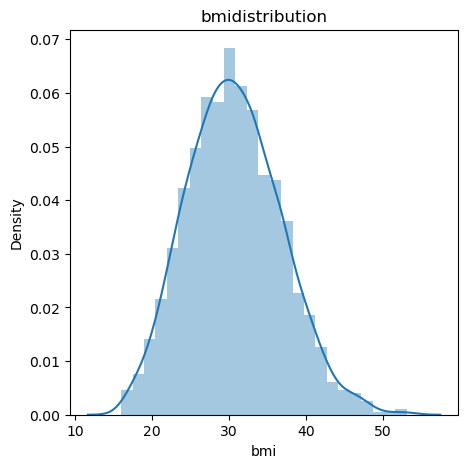

In [9]:
#BMI
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('bmidistribution')
plt.show()

In [19]:
print(df['bmi'].value_counts())

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


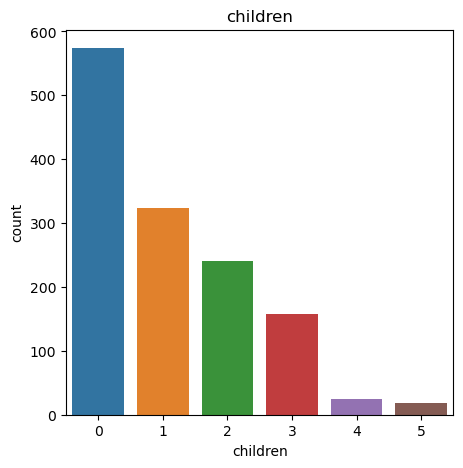

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=df)
plt.title('children')
plt.show()

In [10]:
print(df['children'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


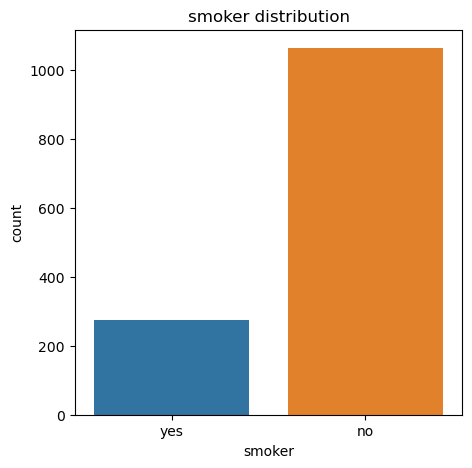

In [21]:
#gender distribution
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('smoker distribution')
plt.show()

In [22]:
print(df['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


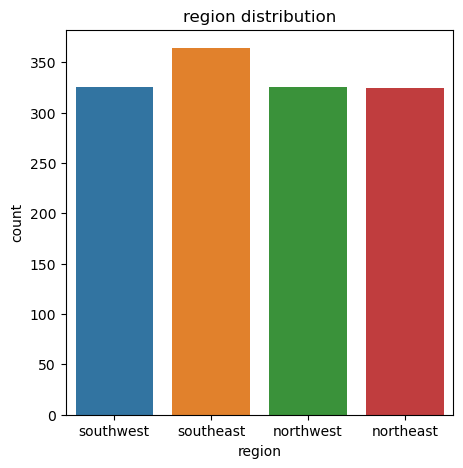

In [23]:
#region distribution
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('region distribution')
plt.show()

In [24]:
print(df['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


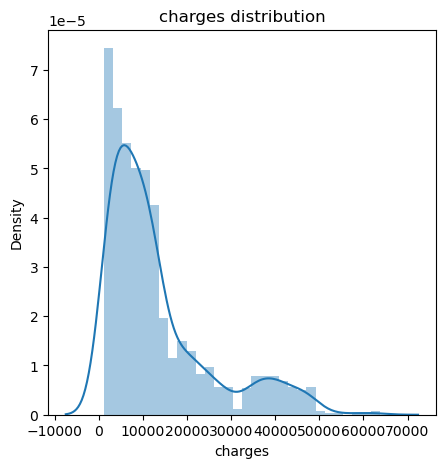

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

In [26]:
print(df['charges'].value_counts())

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


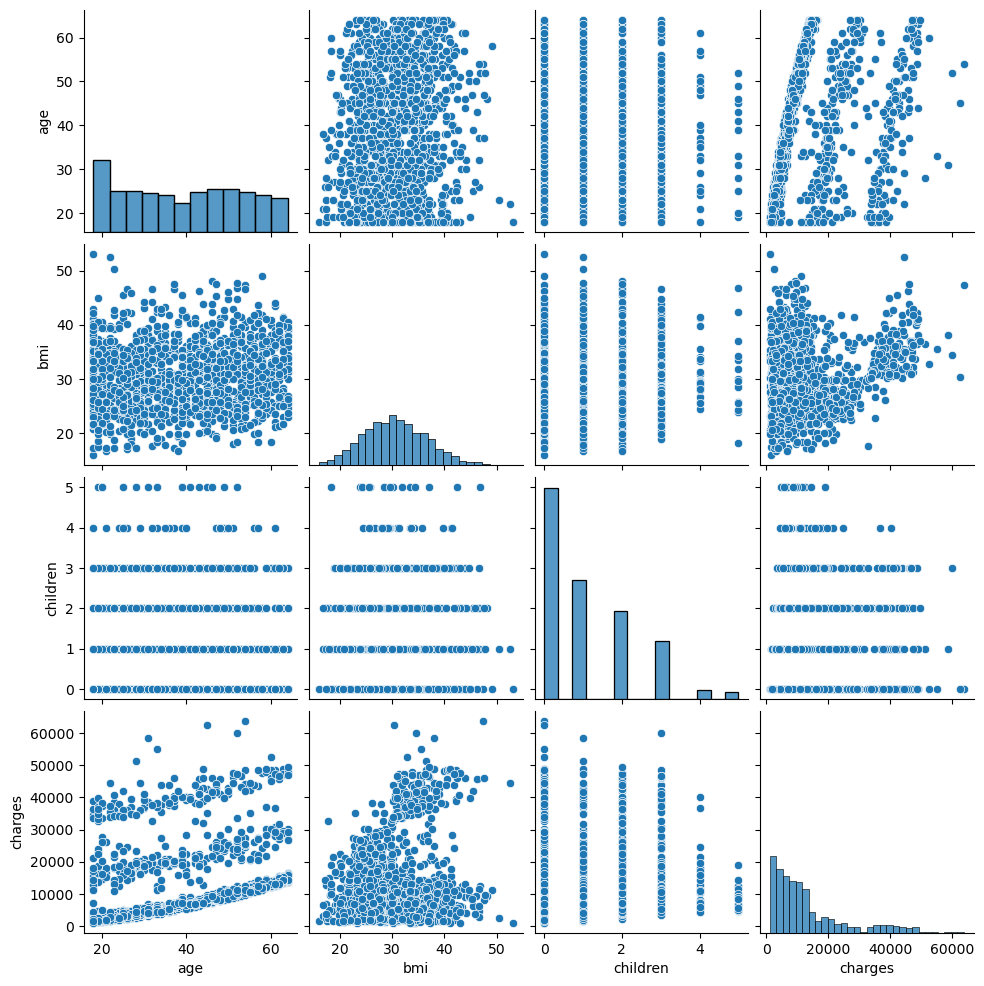

In [27]:
sns.pairplot(df)

<AxesSubplot:xlabel='bmi'>

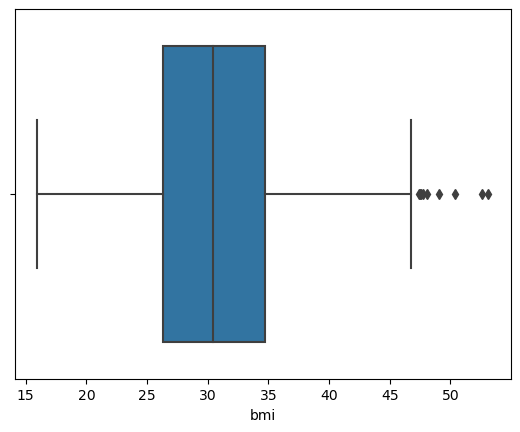

In [28]:
sns.boxplot(data=df,x='bmi',hue='charges')

<AxesSubplot:xlabel='children'>

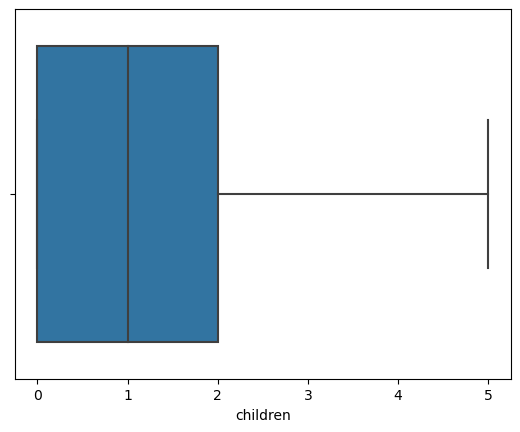

In [29]:
sns.boxplot(data=df,x='children',hue='charges')

<AxesSubplot:xlabel='age'>

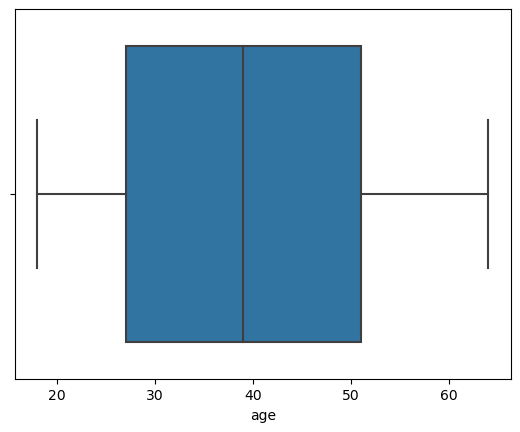

In [30]:
sns.boxplot(data=df,x='age',hue='charges')

<AxesSubplot:xlabel='bmi'>

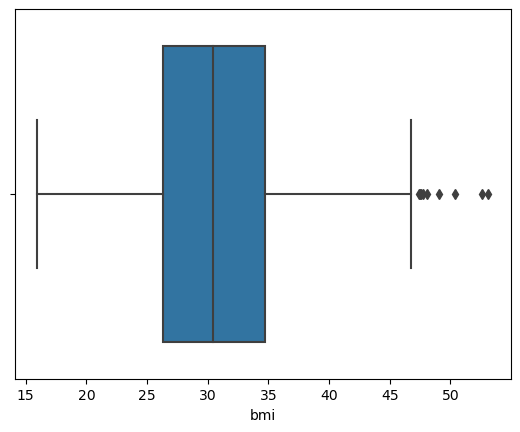

In [78]:
sns.boxplot(data=df,x='bmi',hue='charges')

From the above box plots,we can find that there are no outliers present in the given dataset
Now,we have to convert categorical variables to numerical variables to analyse more and bulit a model.

In [31]:
# we convert yes to 1 and No to 0
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1}).astype(int)

In [32]:
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [33]:
df['region'] = df['region'].replace({'southeast': 0, 'southwest': 1,'northeast': 2, 'northwest': 3}).astype(int)

In [34]:
df['region']

0       1
1       0
2       0
3       3
4       3
       ..
1333    3
1334    2
1335    0
1336    1
1337    3
Name: region, Length: 1338, dtype: int32

In [35]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,1,16884.92400
1,18,male,33.770,1,0,0,1725.55230
2,28,male,33.000,3,0,0,4449.46200
3,33,male,22.705,0,0,3,21984.47061
4,32,male,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,3,10600.54830
1334,18,female,31.920,0,0,2,2205.98080
1335,18,female,36.850,0,0,0,1629.83350
1336,21,female,25.800,0,0,1,2007.94500


In [36]:
df['sex'] = df['sex'].replace({'male': 0, 'female': 1}).astype(int)

In [37]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [38]:
#droping the total charges coluimn to split the data
x=df.drop('charges',axis=1)
y=df['charges']

In [39]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [40]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [41]:
#spilting the data in to train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

In [42]:
X_train

,age,sex,bmi,children,smoker,region
298,31,0,34.390,3,1,3
364,21,1,21.890,2,0,0
211,40,0,30.875,4,0,3
918,61,1,28.200,0,0,1
1061,57,0,27.940,1,0,0
...,...,...,...,...,...,...
763,27,0,26.030,0,0,2
835,42,0,35.970,2,0,0
1216,40,0,25.080,0,0,0
559,19,0,35.530,0,0,3


In [43]:
 y_train

298     38746.35510
364      3180.51010
211      8162.71625
918     13041.92100
1061    11554.22360
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1271, dtype: float64

In [44]:
X_test

,age,sex,bmi,children,smoker,region
578,52,0,30.200,1,0,1
610,47,1,29.370,1,0,0
569,48,0,40.565,2,1,3
1034,61,0,38.380,0,0,3
198,51,1,18.050,0,0,3
...,...,...,...,...,...,...
435,60,0,33.110,3,0,0
1144,50,0,32.300,2,0,1
390,48,0,35.625,4,0,2
483,51,1,39.500,1,0,1


In [45]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
435     13919.82290
1144     9630.39700
390     10736.87075
483      9880.06800
503     32548.34050
Name: charges, Length: 67, dtype: float64

Here we use Linear regression model to predict the medical cost insurance 

In [48]:
from sklearn.metrics import r2_score

In [49]:
regression = LinearRegression()

In [50]:
regression

LinearRegression()

In [51]:
regression.fit(X_train,y_train)
pred_train =regression.predict(X_train)
pred=regression.predict(X_test)
r2 =r2_score(y_test,pred)
print("r2 score",r2)

r2 score 0.7606904728933963


In [52]:
print('r2 score on training data', r2_score(y_train,pred_train)*100)

r2 score on training data 74.92612673525059


In [53]:
df.tail(4)

,age,sex,bmi,children,smoker,region,charges
1334,18,1,31.92,0,0,2,2205.9808
1335,18,1,36.85,0,0,0,1629.8335
1336,21,1,25.80,0,0,1,2007.9450
1337,61,1,29.07,0,1,3,29141.3603


In [84]:
input_data=(18,1,36.85,0,0,0)
num_array=np.asarray(input_data)

In [85]:
num_array

array([18.  ,  1.  , 36.85,  0.  ,  0.  ,  0.  ])

In [86]:
re=num_array.reshape(1,-1)
re

array([[18.  ,  1.  , 36.85,  0.  ,  0.  ,  0.  ]])

In [87]:
predic=regression.predict(re)
print(predic)

[4032.52959188]
